<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/2.%20Web%20service%20dev%20with%20LLM/01.%20Type%20Annotation/1_Type_Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ryuzyproject.tistory.com/25

# 1. 타입 어노테이션
파이썬의 타입 어노테이션(Type Annotation) 은 변수나 함수의 데이터 타입을 명시적으로 표시해주는 기능입니다. 파이썬은 기본적으로 동적 타이핑(dynamic typing) 언어이기 때문에 변수의 타입을 명시하지 않아도 됩니다. 하지만 코드의 가독성과 정적 분석 도구(myPy 등) 사용, IDE의 자동완성에 도움이 되기 때문에 타입 어노테이션을 사용하는 것이 좋습니다.

# 2. 변수 타입 어노테이션
실제로 name = 123 같은 다른 타입을 할당해도 파이썬이 에러를 내지는 않습니다. (런타임에는 영향을 주지 않음)

In [8]:
name = '김사과'
name: str = '김사과' # String type annotation
print(name)

age = 10
age:int = 10 # 띄어쓰기 상관없음
print(age)

height = 160.5
height: float = 160.5
print(height)

is_lover = True
is_lover: bool = True
print(is_lover)

김사과
10
160.5
True


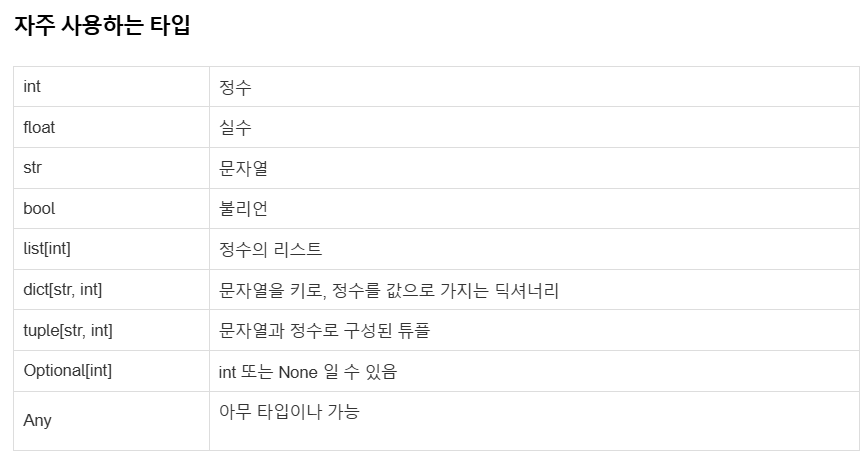

# 3. 리스트, 튜플, 딕셔너리, 세트


In [10]:
# List
names = ['김사과', '오렌지', '반하나']
name: list[str] = ['김사과', '오렌지', '반하나'] # 리스트 어노테이션
print(names)

# 다양한 타입을 한번에 넣는법
values: list[int | str] = [1, 'two', 3, 'four'] # integer or string
print(values)

['김사과', '오렌지', '반하나']
[1, 'two', 3, 'four']


In [11]:
name: list[int] = ['김사과', '오렌지', '반하나'] # 에러가 발생하지는 않는다 (그냥 개발자들이 볼려고 쓰는것)
print(names)

['김사과', '오렌지', '반하나']


In [17]:
# Tuple
age = (25, 20)
age: tuple[int, int] = (25, 20) # 들어가는 개수만큼 타입을 써야한다.
print(age)

# 같은타입을 여러개를 넣고싶을때
numbers: tuple[int, ...] = (1, 2, 3, 4, 5)
print(numbers)

(25, 20)
(1, 2, 3, 4, 5)


In [20]:
# Dictionary
student_scores = {'김사과' : 90.5, '오렌지' : 88.3}
student_scores: dict[str, float] = {'김사과' : 90.5, '오렌지' : 88.3}
print(student_scores)

{'김사과': 90.5, '오렌지': 88.3}


In [22]:
# Set
unique_numbers = {1, 2, 3, 3, 4}
unique_numbers: set[int] = {1, 2, 3, 3, 4}
print(unique_numbers)

{1, 2, 3, 4}


# 4. 함수

In [23]:
def add(a, b):
    return a + b

print(add(10, 3))

13


In [25]:
# 만약 함수가 모듈안에 들어있으면 실수를 할 수 있다(타입을 모르기 때문)
# 따라서 타입을 넣어주면 가독성이 좋아진다.

def add(a: int, b: int) -> int:
    return a + b

print(add(10, 3))
print(add('십', '삼')) # 결과는 같지만 실수를 적게하게된다.

# 타입 어노테이션을 확인
add.__annotations__ # 어떤 함수나 클래스에대해서 타입 어노테이션을 확인할 수 있는 매직 메서드

13
십삼


{'a': int, 'b': int, 'return': int}

In [26]:
def greet(user: str | None) -> str:   # str이 들어갈수 있지만 None도 들어갈수 있다. 근데 결과는 Str로 나온다.
    return f"Hello, {user or 'Guest'}"

print(greet(None))
print(greet('apple')) #none, str 둘다 가능

Hello, Guest
Hello, apple


# 5. 클래스

In [28]:
class Student:
    def __init__(self, name: str, age: int):  # name -> str, age -> int
          self.name = name
          self.age = age
    def __str__(self) -> str: # returns string
          return '이름: ' + self.name + ', 나이: ' + str(self.age)

def print_student(s: Student) -> None:  # s는 student 클래스로 만든 Object 여야 한다. 그리고 결과는 None (리턴타입이 없다)
    print(f'이름: {s.name}, 나이: {s.age} 🎃')

In [29]:
student = Student('김사과', 20)
print(student)

이름: 김사과, 나이: 20


In [30]:
print_student(student)

이름: 김사과, 나이: 20 🎃


# **6. 옵셔널**
변수가 특정 타입이거나 None일 수 있는 경우 Optional을 사용합니다.

In [31]:
# 매개변수의 옵셔널
def Hello(name: str | None) -> str: # var can be str or None and returns str
    if name is None: # None하고 비교할때는 is로
        return "Hello, Guest!"
    return f"Hello, {name}!"

In [32]:
print(Hello('apple'))
print(Hello(None))

Hello, apple!
Hello, Guest!


In [48]:
# 리턴타입의 옵셔널
def find_user(user_id: int) -> str | None:
    if user_id == 1:
        return "apple"
    return None

In [52]:
find_user(1) # returns apple

'apple'

In [53]:
find_user(99) # returns none

In [54]:
# dictionary
users: dict[int, str] = {
    1: "apple",
    2: "banana"
}

def get_user(user_id: int) -> str | None: # returns string or None
    return users.get(user_id)

In [44]:
get_user(1)

'apple'

In [45]:
get_user(2)

'banana'

In [46]:
get_user(3) # does not cause err

# 7. Any
Any는 특정 타입을 지정할 수 없을 때 사용하는 타입 힌트용 특수 타입입니다.

In [55]:
from typing import Any # typing 이라는 모듈을 사용해야만 any를 쓸 수 있다.

def process(data: Any) -> None: # 모든 타입을 넣을 수 있다.
    print(data)

In [56]:
process('안녕')

안녕


In [57]:
process(1)

1
